In [3]:
import pandas as pd
df = pd.read_csv("online_retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Remove missing Customer ID
df = df.dropna(subset=['Customer ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
#Remove cancelled orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397925 non-null  object 
 1   StockCode    397925 non-null  object 
 2   Description  397925 non-null  object 
 3   Quantity     397925 non-null  int64  
 4   InvoiceDate  397925 non-null  object 
 5   Price        397925 non-null  float64
 6   Customer ID  397925 non-null  float64
 7   Country      397925 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [14]:
#Remove Negative Quantity
df = df[df['Quantity'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397925 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397925 non-null  object 
 1   StockCode    397925 non-null  object 
 2   Description  397925 non-null  object 
 3   Quantity     397925 non-null  int64  
 4   InvoiceDate  397925 non-null  object 
 5   Price        397925 non-null  float64
 6   Customer ID  397925 non-null  float64
 7   Country      397925 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [16]:
#Create Total price column
df['TotalPrice'] = df['Quantity'] * df['Price']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397925 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397925 non-null  object 
 1   StockCode    397925 non-null  object 
 2   Description  397925 non-null  object 
 3   Quantity     397925 non-null  int64  
 4   InvoiceDate  397925 non-null  object 
 5   Price        397925 non-null  float64
 6   Customer ID  397925 non-null  float64
 7   Country      397925 non-null  object 
 8   TotalPrice   397925 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [20]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("retail.db")

df_sql = df.copy()
df_sql["InvoiceDate"] = pd.to_datetime(df_sql["InvoiceDate"]).dt.strftime("%Y-%m-%d %H:%M:%S")

df_sql.to_sql("retail", conn, if_exists="replace", index=False)

conn.execute('CREATE INDEX IF NOT EXISTS idx_customer ON retail("Customer ID");')
conn.execute('CREATE INDEX IF NOT EXISTS idx_invoice ON retail("Invoice");')
conn.execute('CREATE INDEX IF NOT EXISTS idx_date ON retail("InvoiceDate");')
print("Loaded to SQLite ✅")

Loaded to SQLite ✅


In [28]:
#Total Revenue per customer
query = """
SELECT
    "Customer ID",
    SUM(Quantity * Price) AS TotalRevenue
FROM retail
GROUP BY "Customer ID"
ORDER BY TotalRevenue DESC;
"""

pd.read_sql_query(query, conn)

,Customer ID,TotalRevenue
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
...,...,...
4334,17956.0,12.75
4335,16454.0,6.90
4336,14792.0,6.20
4337,16738.0,3.75


In [32]:
#Purchase Frequency
query = """
SELECT
    "Customer ID",
    COUNT(DISTINCT Invoice) AS PurchaseFrequency
FROM retail
GROUP BY "Customer ID";
"""
pd.read_sql_query(query, conn)

,Customer ID,PurchaseFrequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


In [33]:
# Average Order Value
query= """
SELECT
    "Customer ID",
    SUM(Quantity * Price) / COUNT(DISTINCT Invoice) AS AvgOrderValue
FROM retail
GROUP BY "Customer ID";
"""
pd.read_sql_query(query,conn)

,Customer ID,AvgOrderValue
0,12346.0,77183.600000
1,12347.0,615.714286
2,12348.0,449.310000
3,12349.0,1757.550000
4,12350.0,334.400000
...,...,...
4334,18280.0,180.600000
4335,18281.0,80.820000
4336,18282.0,89.025000
4337,18283.0,130.930000


In [39]:
#Change datatype for Customer ID
df = df.dropna(subset=["Customer ID"])
df["Customer ID"] = df["Customer ID"].astype(int)
df.to_sql("retail", conn, if_exists="replace", index=False)
pd.read_sql_query(query,conn)


,Customer ID,AvgOrderValue
0,12346,77183.600000
1,12347,615.714286
2,12348,449.310000
3,12349,1757.550000
4,12350,334.400000
...,...,...
4334,18280,180.600000
4335,18281,80.820000
4336,18282,89.025000
4337,18283,130.930000


In [40]:
df[['Quantity','Price']].describe()

,Quantity,Price
count,397925.000000,397925.000000
mean,13.021793,3.116212
std,180.419984,22.096773
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [41]:
df.assign(Total=df['Quantity']*df['Price']).sort_values('Total', ascending=False).head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Total
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom,168469.60,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,77183.60,77183.60
222671,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.50,15098,United Kingdom,38970.00,38970.00
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029,United Kingdom,8142.75,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,9/20/2011 11:05,5.06,17450,United Kingdom,7144.72,7144.72
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/2011 12:55,2.10,15749,United Kingdom,6539.40,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/2011 13:20,2.10,15749,United Kingdom,6539.40,6539.40
421601,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/2011 12:11,2.08,14646,Netherlands,4992.00,4992.00
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,1/11/2011 12:55,2.55,15749,United Kingdom,4921.50,4921.50
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,4/18/2011 13:20,2.40,15749,United Kingdom,4632.00,4632.00


In [42]:
#Overall AOV
query="""
SELECT
  SUM(Quantity * Price) * 1.0 / COUNT(DISTINCT Invoice) AS OverallAOV
FROM retail;
"""
pd.read_sql_query(query,conn)

,OverallAOV
0,480.763158


In [46]:
#Calculating RFM
import datetime as dt

# Convert date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [47]:
#Calculating Score RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

In [48]:
#Create Customer Segments
def segment(score):
    if score >= 9:
        return "High Value"
    elif score >= 6:
        return "Mid Value"
    else:
        return "Low Value"

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

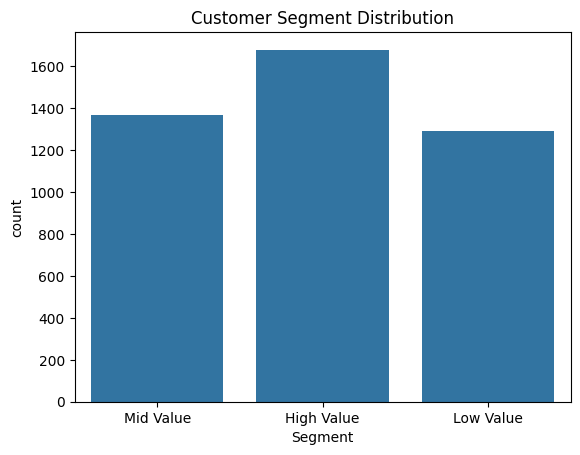

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=rfm, x='Segment')
plt.title("Customer Segment Distribution")
plt.show()

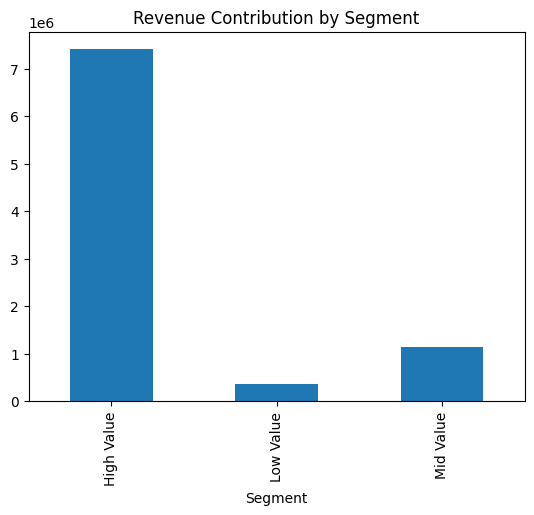

In [50]:
rfm.groupby('Segment')['Monetary'].sum().plot(kind='bar')
plt.title("Revenue Contribution by Segment")
plt.show()

In [51]:
rfm.to_csv("customer_segments.csv")

# New Section